Name: Keerith Phachu

Student number: 20867412

Group number: 25

DSCI 100 Inidivudal Project 



In [1]:
#Starting off by importing the library 
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Doing this to open up the data
players <- read_csv("https://raw.githubusercontent.com/ksp1113/dsci-100-indivudal-kp/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/ksp1113/dsci-100-indivudal-kp/refs/heads/main/sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
#Number of rows and columns for the data 
tibble(
  dataset = c("players", "sessions"),
  n_rows  = c(nrow(players), nrow(sessions)),
  n_cols  = c(ncol(players), ncol(sessions))
)

#Summary Statistics for player data (using round function to set values around 2 decimal places)
player_summary <- players |>
    summarize(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
    max_played_hours = round(max(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    min_age = round(min(Age, na.rm = TRUE), 2),
    max_age = round(max(Age, na.rm = TRUE), 2))
player_summary 

#Summary Statistics for sessions data (using round function to set values around 2 decimal places)
sessions_summary <- sessions |>
    mutate(session_length = original_end_time - original_start_time)|>
  summarize(
    mean_session = mean(session_length, na.rm = TRUE),
    max_session = max(session_length, na.rm = TRUE))
sessions_summary


dataset,n_rows,n_cols
<chr>,<int>,<int>
players,196,7
sessions,1535,5


mean_played_hours,min_played_hours,max_played_hours,mean_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0,223.1,21.14,9,58


mean_session,max_session
<dbl>,<dbl>
2909328,2e+07


***player.csv dataset variable information***

experience: A categorical variable describing a player’s experience level on the Minecraft server. Categories include Beginner, Pro, Amateur, Regular, and Veteran.

subscribe: A logical variable (TRUE/FALSE) indicating whether a player is subscribed to the server.

hashedEmail: A character variable containing encoded email information. Because the data are anonymized and the meaning of the hash values is unclear, this variable will not be included in the analysis.

played_hours: A numeric (double) variable representing the total time each player has spent on the server.

name: A character variable listing the player’s name.

gender: A categorical variable indicating the player’s gender.

age: A numeric variable representing the player’s age at the time of play.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
***sessions.csv dataset variable information***

hashedEmail: A character variable linking players to their session data.

start_time and end_time: Character variables showing the date and time a player logged on and off the server.

original_start_time and original_end_time: Numeric variables that provide unitless timestamps for login and logout events. Because these variables contain long decimal values and lack meaningful units, they are unsuitable 
for this analysis and should not be included.

---------------------------------------------------------------------------------------------------Part 2 ----------------------------------------------------------------------------------------------------------------------

**Question being addressed**


We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. The project will aim to predict whether specific player demographics in the “player.csv” data set (gender, age, experience) can predict how many hours they have played on the server. The data would need to be wrangled to convert the played hours variable to average hours, filter out any non permissible values with na.rm, grouping gender and experience and then rounding the numerical values to 2 decimal places for readability. 



---------------------------------------------------------------------------------------------------Part 3 -----------------------------------------------------------------------------------------------------------------------

Age,mean_hours
<dbl>,<dbl>
9,30.30
10,3.60
11,2.90
12,0.50
14,8.70
15,0.10
16,50.03
17,4.89
18,0.23


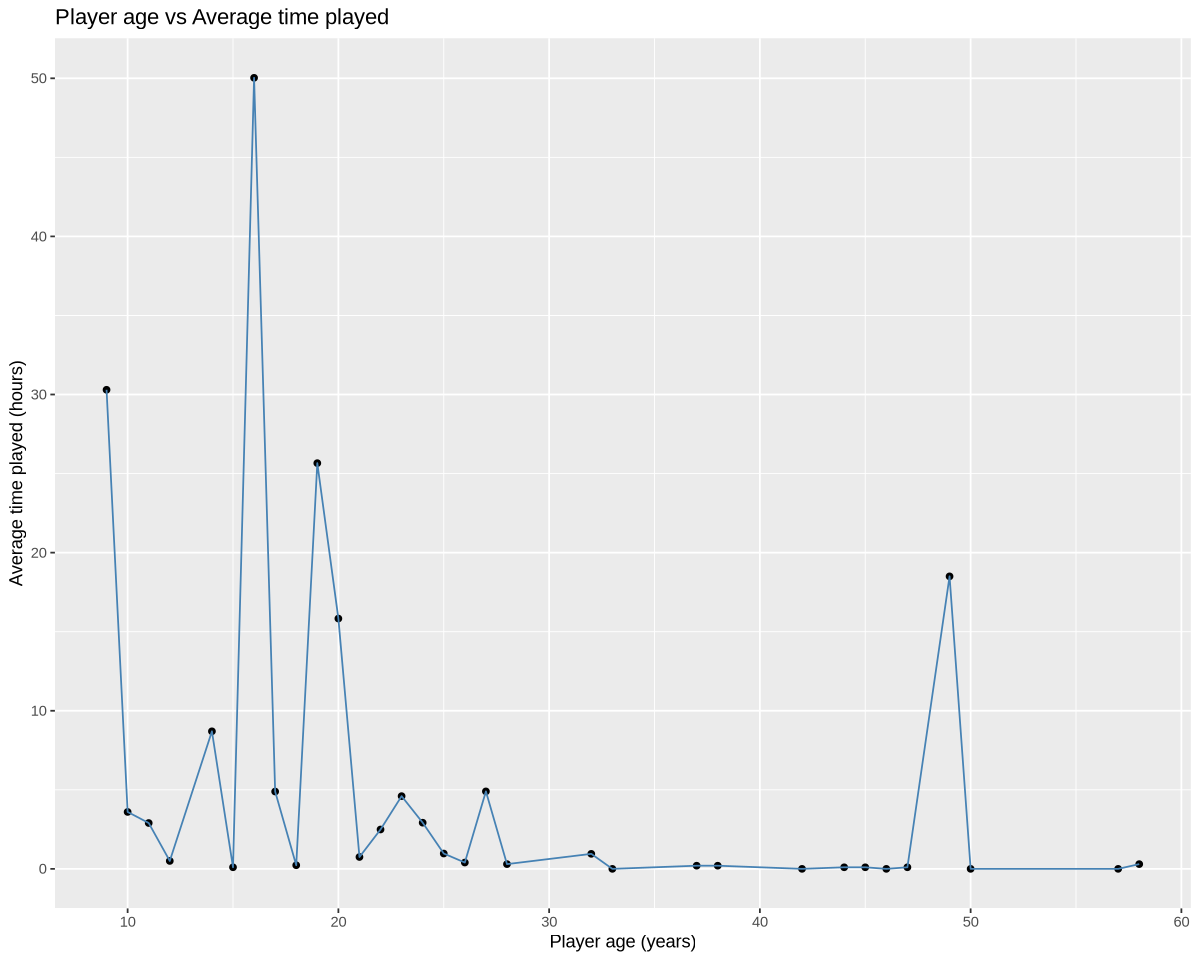

In [4]:
options(repr.plot.width = 10, repr.plot.height = 8)
#Start with filtering all data that has the age variable and then find the mean hours
age_summary <- players |>
  filter(!is.na(Age)) |>
  group_by(Age) |>
  summarize(mean_hours = round(mean(played_hours, na.rm = TRUE), 2))
age_summary

#Plot the data in a scatterplot with a line, remove all non permissible data by using na.rm=TRUE
age_plot <- ggplot(age_summary, aes(x=Age, y = mean_hours)) +
            geom_point(na.rm=TRUE)+
            geom_line(color="steelblue", na.rm=TRUE)+
            labs(x= "Player age (years)", y = "Average time played (hours)", title = "Player age vs Average time played")
age_plot

Based on the plot above, we can see that the highest points on the graph are with individuals between the ages of 10 to 20 years old. Past that specific age group, we can see that the average time played for most groups is below the 20 hour mark. 

gender,mean_hours
<chr>,<dbl>
Agender,6.25
Female,10.64
Male,4.13
Non-binary,14.88
Other,0.20
Prefer not to say,0.37
Two-Spirited,0.08


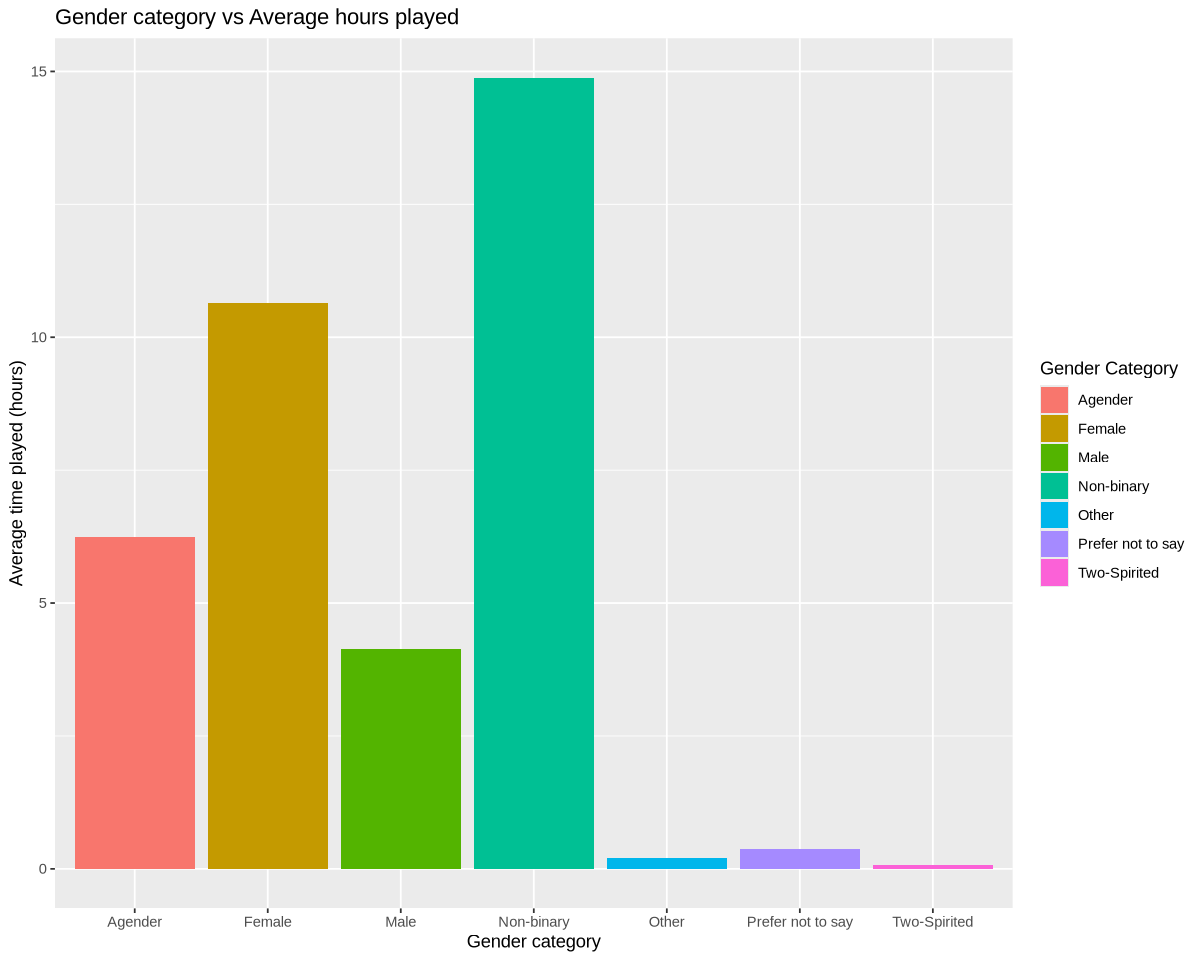

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the genders and then finding the mean hours played for each gender category
players_gender<- players |>
  group_by(gender) |>
  summarize(mean_hours = round(mean(played_hours, na.rm = TRUE),2))
players_gender

#Plotting the data out on a easy to view bar plot
gender_plot <- ggplot(players_gender, aes(x=gender, y= mean_hours, fill = gender)) +
               geom_bar(stat= "identity")+
               labs(x= "Gender category", y = "Average time played (hours)", fill = "Gender Category", title = "Gender category vs Average hours played") 
gender_plot

Based on the plot above, the gender category with the highest average playtime is the non-binary caterogry (Female at 2nd and Agender at third). 

experience,mean_hours_exp
<chr>,<dbl>
Amateur,6.02
Beginner,1.25
Pro,2.60
Regular,18.21
Veteran,0.65


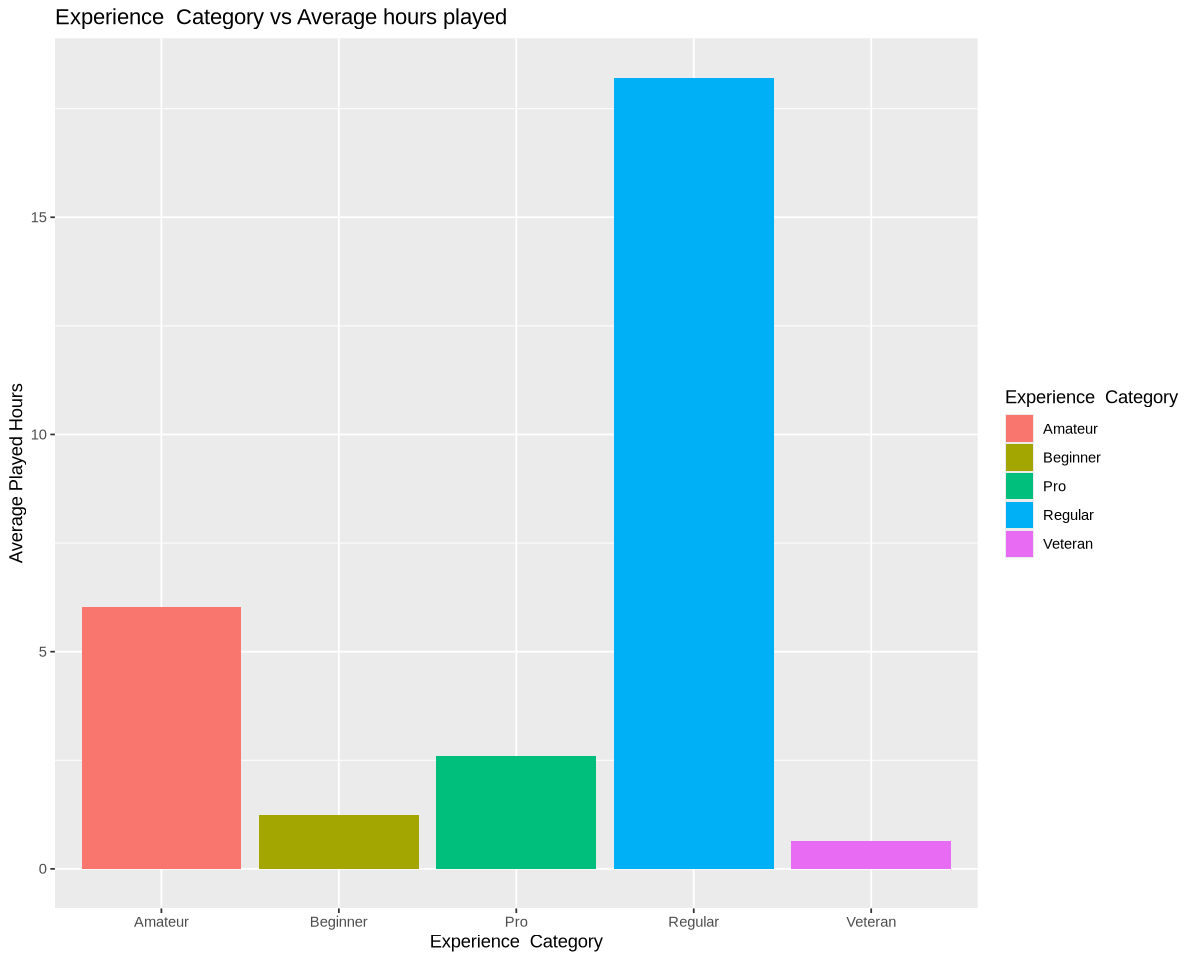

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

#Start by grouping the experience and then finding the mean hours played for each expereince category 
players_experience <- players |>
  group_by(experience) |>
  summarize(mean_hours_exp = round(mean(played_hours, na.rm = TRUE),2))
players_experience

#Plotting the data out on a easy to view bar plot
experience_plot <- ggplot(players_experience, aes(x=experience, y= mean_hours_exp, fill = experience)) +
               geom_bar(stat= "identity")+
               labs(x= "Experience  Category", y = "Average Played Hours", fill = "Experience  Category", title = "Experience  Category vs Average hours played")
experience_plot

Based on the plot above, we can see that the players with the highest average play time fall under the "Regular" experience category at ~18 hours, which is much higher than second place (Amateur at around 6 hours). There also does not appear to be any correlation with the ranking of each catergory > it would be reasonable to assume that the pro's would have the highest average played hours but in this case we don't see that. 

---------------------------------------------------------------------------------------------------Part 4------------------------------------------------------------------------------------------------------------------------

To analyze the data provided above, the proposed method is to perform KNN regression. This method is appropriate because after observing the initial plots, it is clear that the predictors (age,gender,experience) follow a non linear trend, thus linear regression would not be a viable method to use. The main concern that would have to be addressed is that all the variables need to be standardized on comparable scales and an adequate number of neighbours needs to be used to make a viable prediction. The downside with the selected model is that KNN regression does not perform very well with small sets of data, but this issue should not have much impact given the amount of data in the player.csv dataset. Various different K values will be tested with the tuning function and compared using cross-validated Root Mean Squared Error (RMSE). The K value that returns the lowest RMSE will be used in the final predictive model. The data will be split 75/25 (so 75% of the data will be the training data) and this splitting will occur before any model fitting or processing. A 5-fold cross validation will be used on the training data to tune for K. 